In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 11.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=65a59e94bc8e83de02caef75168475f2bd7e2e61d82390fa71a4cfa44d437a92
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
stock='TSLA'
tsla= yf.download(stock,period='10y')
tsla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-22,6.314,6.690,6.300,6.680,6.680,7648500
2010-11-23,6.658,7.136,6.438,6.914,6.914,7889000
2010-11-24,7.054,7.194,6.866,7.094,7.094,7125000
2010-11-26,7.120,7.200,6.950,7.064,7.064,1753000
2010-11-29,7.082,7.190,6.666,6.866,6.866,5728000


In [ ]:
tsla['Daily Return']=tsla['Adj Close'].pct_change()

In [ ]:
tsla['Daily Return'].replace({np.nan:0},inplace=True)

In [ ]:
tsla

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2010-11-22,6.314000,6.690000,6.300000,6.680000,6.680000,7648500,0.000000
2010-11-23,6.658000,7.136000,6.438000,6.914000,6.914000,7889000,0.035030
2010-11-24,7.054000,7.194000,6.866000,7.094000,7.094000,7125000,0.026034
2010-11-26,7.120000,7.200000,6.950000,7.064000,7.064000,1753000,-0.004229
2010-11-29,7.082000,7.190000,6.666000,6.866000,6.866000,5728000,-0.028029
...,...,...,...,...,...,...,...
2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600,-0.001004
2020-11-17,460.170013,462.000000,433.010010,441.609985,441.609985,61188300,0.082139
2020-11-18,448.350006,496.000000,443.500000,486.640015,486.640015,78044000,0.101968


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


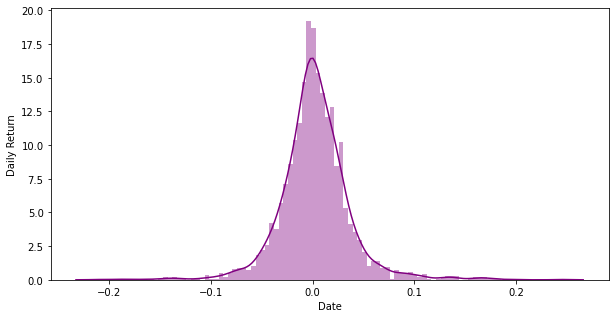

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(tsla['Daily Return'], bins=100, color='purple')
plt.ylabel('Daily Return')
plt.xlabel('Date')
plt.show()

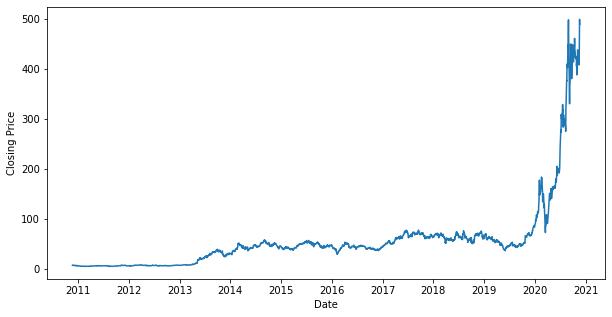

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(tsla['Close'])
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.show()

## Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import math

In [ ]:
tsla=tsla.reset_index()

In [ ]:
tsla

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,2010-11-22,6.314000,6.690000,6.300000,6.680000,6.680000,7648500,0.000000
1,2010-11-23,6.658000,7.136000,6.438000,6.914000,6.914000,7889000,0.035030
2,2010-11-24,7.054000,7.194000,6.866000,7.094000,7.094000,7125000,0.026034
3,2010-11-26,7.120000,7.200000,6.950000,7.064000,7.064000,1753000,-0.004229
4,2010-11-29,7.082000,7.190000,6.666000,6.866000,6.866000,5728000,-0.028029
...,...,...,...,...,...,...,...,...
2513,2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600,-0.001004
2514,2020-11-17,460.170013,462.000000,433.010010,441.609985,441.609985,61188300,0.082139
2515,2020-11-18,448.350006,496.000000,443.500000,486.640015,486.640015,78044000,0.101968
2516,2020-11-19,492.000000,508.609985,487.570007,499.269989,499.269989,62475300,0.025953


In [ ]:
data_training = tsla[tsla['Date']<'2015-11-19'].copy()
data_test = tsla[tsla['Date']>='2015-11-19'].copy()

In [ ]:
data_training=data_training.iloc[:,5:6].values

In [ ]:
data_training

array([[ 6.67999983],
       [ 6.91400003],
       [ 7.09399986],
       ...,
       [42.86199951],
       [42.79999924],
       [44.2140007 ]])

In [ ]:
scalar=MinMaxScaler()
data_training=scalar.fit_transform(data_training)
data_training

array([[0.04379092],
       [0.04821922],
       [0.05162559],
       ...,
       [0.7285114 ],
       [0.72733808],
       [0.75409713]])

In [ ]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(1197, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0445
Epoch 2/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0064
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0040
Epoch 13/100
38/38 [=====

In [ ]:
data_training = tsla[tsla['Date']<'2015-11-19'].iloc[:,5:6]
data_test = tsla[tsla['Date']>='2015-11-19'].iloc[:,5:6]
dataset_total=pd.concat((data_training,data_test),axis=0)

In [ ]:
dataset_total=dataset_total.values

In [ ]:
dataset_total

array([[  6.67999983],
       [  6.91400003],
       [  7.09399986],
       ...,
       [486.64001465],
       [499.26998901],
       [489.60998535]])

In [ ]:
data_test=data_test.values

In [ ]:
data_test

array([[ 44.36000061],
       [ 44.0019989 ],
       [ 43.54999924],
       ...,
       [486.64001465],
       [499.26998901],
       [489.60998535]])

In [ ]:
inputs = dataset_total[len(dataset_total) - len(data_test) - 60:]
inputs = inputs.reshape(-1,1)
inputs = scalar.transform(inputs)
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])

X_test = np.array(X_test)
X_test.shape

(1261, 60, 1)

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scalar.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price

array([[ 43.69639 ],
       [ 44.349834],
       [ 44.760334],
       ...,
       [118.5977  ],
       [119.1197  ],
       [119.13761 ]], dtype=float32)

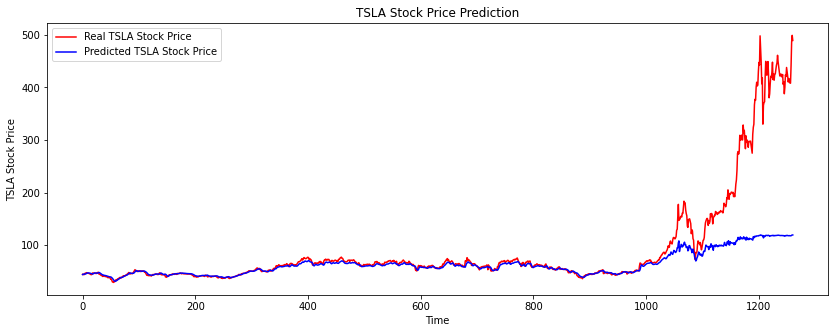

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(data_test, color = 'red', label = 'Real TSLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TSLA Stock Price')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TSLA Stock Price')
plt.legend()
plt.show()